# Models and Quality

# Библиотечки

In [ ]:
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

sns.set_theme()

# Данные

In [ ]:
df = datasets.load_iris(as_frame=True)
X = df.data
y = df.target

In [ ]:
X

# Logreg

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_ = X.iloc[:, [0, 1]]

model = LogisticRegression(C=1e5)
model.fit(X_, y)

_, ax = plt.subplots(figsize=(12, 6))
DecisionBoundaryDisplay.from_estimator(
    model,
    X_,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

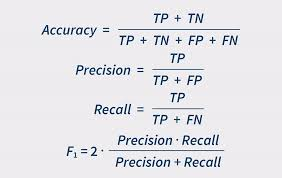

In [ ]:
model = LogisticRegression()
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)

accuracy_score(y, y_pred)

In [ ]:
print(classification_report(y, y_pred))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_ = X.iloc[:, [0, 1]]

model = KNeighborsClassifier()
model.fit(X_, y)

_, ax = plt.subplots(figsize=(12, 6))
DecisionBoundaryDisplay.from_estimator(
    model,
    X_,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_ = X.iloc[:, [0, 1]]

logreg = DecisionTreeClassifier()
logreg.fit(X_, y)

_, ax = plt.subplots(figsize=(12, 6))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X_,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)

accuracy_score(y, y_pred)

In [ ]:
print(classification_report(y, y_pred))

# Это Overfit!!!

Попробуем:
- увидеть его в цифрах
- решить трабл

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
accuracy_score(y_test, y_pred)

Полученный результат намного меньше того, что мы получали ранее. Но в нем мы **уверены** гораздо больше!

## Кросс валидация

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
scores = []
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=2024)
for num, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [ ]:
scores

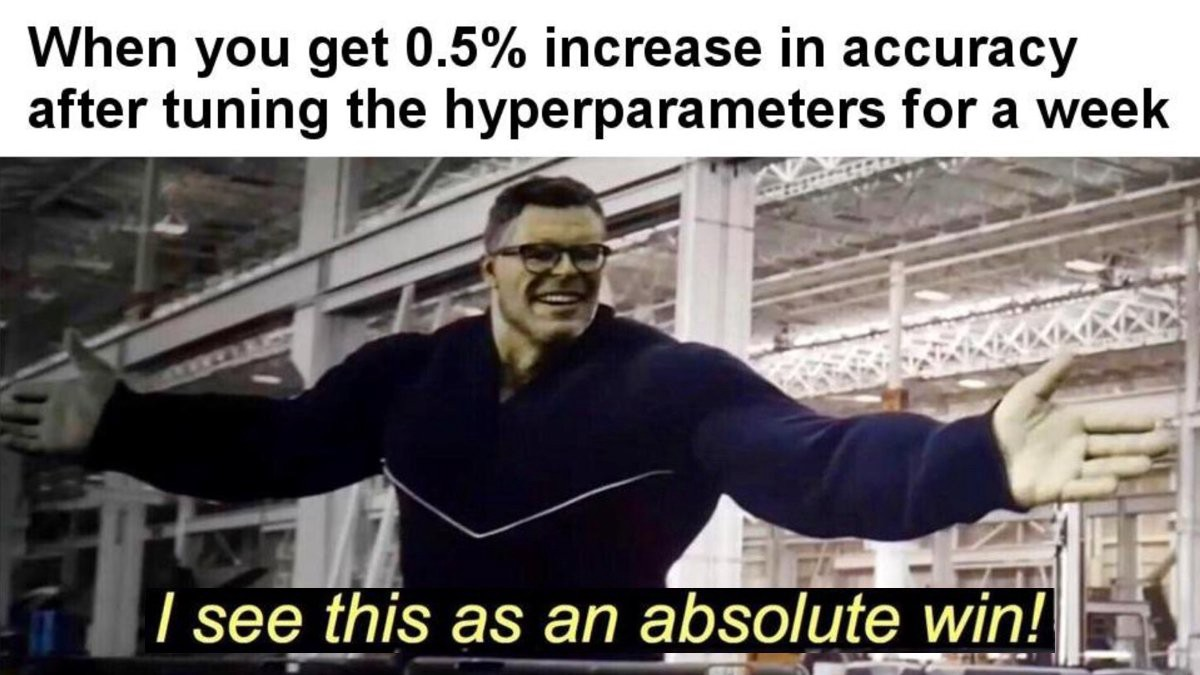

Как убрать оверфит и повысить качество?

In [ ]:
scores = []
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=2024)
for num, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression(C=1e5)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [ ]:
scores

In [ ]:
scores = []
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=2024)
for num, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [ ]:
scores